In [2]:
print (bin(5))

0b101


In [8]:
a = 5
b = 1
print (a << 1)

10


In [10]:
import numpy as np
import numpy.matlib
import cv2
import scipy.signal as signal

# 这是“中值滤波”的作业。


# 仅支持单通道图像数据
def medianBlur(img, kernel, padding_way):
    m, n = img.shape  # 获取输入图片的尺寸（行和列）
    m_kernel, n_kernel = kernel.shape
    # 赵老师说，中值滤波模板的长度和宽度，可以不同，而且可以是偶数，感觉很神奇，第一次听说。
    img_Padding = np.zeros((m+m_kernel-1, n+n_kernel-1))
    # mStart表示在填充图中原始图像数据的起始行号。
    mStart = m_kernel >> 1
    nStart = n_kernel >> 1
    img_Padding[mStart:mStart+m, nStart:nStart+n] = img

    # cv2.imshow('img_Padding1', img_Padding)
    # key = cv2.waitKey()
    # if key == 27:
    #     cv2.destroyAllWindows()
    # # 这是Bug的测试代码

    if padding_way != 'ZERO':
        img_Padding = np.lib.pad(img, ((mStart,), (nStart,)), mode='edge')
    # 填充操作结束

    print(img_Padding)

    img_Blur = np.zeros((m, n))

    # 滑动窗口进行滤波
    for i in range(m):
        for j in range(n):
            window = kernel*img_Padding[i:i+m_kernel, j: j+n_kernel]
            img_Blur[i, j] = getMedian(window)
    # 滤波结束

    img_Blur = np.array(img_Blur).astype('uint8')
    return img_Blur
# medianBlur函数结束


def getMedian(window):
    window = np.sort(window.ravel())
    size = window.size

    # 如果window中有奇数个数字
    median = window[size >> 1]

    if size % 2 == 0:
        median = (median+window[size >> 1]) >> 1
    # 判断结束

    return median
# getMedianKernel函数结束

def getMedianKernel(m, n):
    return np.ones((m, n))
# getMedianKernel函数结束


# 首先是基本的正确性测试
img = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
kernel = getMedianKernel(3, 3)
img_Blur = medianBlur(img, kernel, 'REPLICA')
print(img_Blur)

# 对图片进行测试
img_Gray = cv2.imread('./noise3.png', 0)
kernel = getMedianKernel(3, 3)
img_Blur = medianBlur(img_Gray, kernel, 'REPLICA')

print('Processing finished!')

cv2.imshow('Median Blur', img_Gray)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

cv2.imshow('Median Blur2', img_Blur)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

[[1 1 2 3 3]
 [1 1 2 3 3]
 [4 4 5 6 6]
 [7 7 8 9 9]
 [7 7 8 9 9]]
[[2 3 3]
 [4 5 6]
 [7 7 8]]
[[157 157 152 ... 175 180 180]
 [157 157 152 ... 175 180 180]
 [152 152 148 ... 170 174 174]
 ...
 [ 22  22  12 ... 123 136 136]
 [ 41  41  26 ... 138 150 150]
 [ 41  41  26 ... 138 150 150]]
Processing finished!


In [13]:
#  sklearn
from sklearn import datasets#引入数据集,sklearn包含众多数据集
from sklearn.model_selection import train_test_split#将数据分为测试集和训练集
from sklearn.neighbors import KNeighborsClassifier#利用邻近点方式训练数据

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 18
         Gradient evaluations: 6


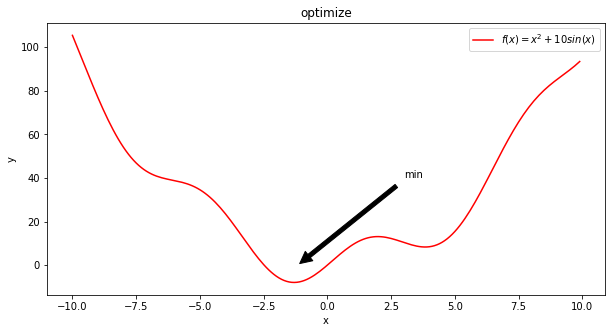

In [22]:
#scipy 例子 目标函数求解
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

#定义目标函数
def f(x):
    return x**2+10*np.sin(x)

#绘制目标函数的图形
plt.figure(figsize=(10,5))
x = np.arange(-10,10,0.1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('optimize')
plt.plot(x,f(x),'r-',label='$f(x)=x^2+10sin(x)$')
#图像中的最低点函数值
a = optimize.fmin_bfgs(f,0)[0]
plt.annotate('min',xy=(-1.3,a),xytext=(3,40),arrowprops=dict(facecolor='black',shrink=0.05))
plt.legend()
plt.show()

In [19]:
optimize.fmin_bfgs(f,0)

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 18
         Gradient evaluations: 6


array([-1.30644012])

In [20]:
optimize.fminbound(f,-10,10)3#退火算法

-1.306440096615395

In [23]:
from scipy import optimize

xdata = np.linspace(-10, 10, num=20)
ydata = f(xdata) + np.random.randn(xdata.size)
def f2(x, a, b):
    return a*x**2 + b*np.sin(x)

guess = [2, 2]
params, params_covariance = optimize.curve_fit(f2, xdata, ydata, guess)
print(params)

[1.00308029 9.99606582]


k= 0.6134953455847637 
b= 1.7940925604097506


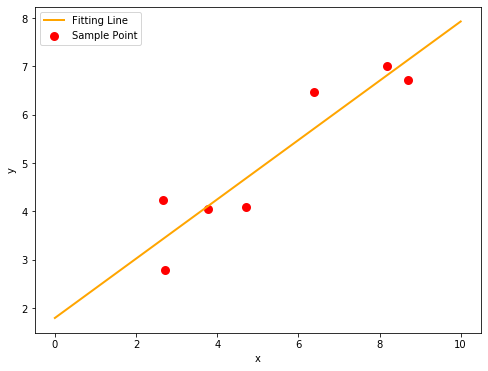

In [40]:
'''
使用最小二乘法拟合直线
'''
import numpy as np
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

#训练数据
Xi = np.array([8.19,2.72,6.39,8.71,4.7,2.66,3.78])
Yi = np.array([7.01,2.78,6.47,6.71,4.1,4.23,4.05])

#定义拟合函数形式
def func(p,x):
    k,b = p
    return k*x+b

#定义误差函数
def error(p,x,y):
    return func(p,x)-y

#随机给出参数的初始值
p = [10,2]

#使用leastsq()函数进行参数估计

Para = leastsq(error,p,args=(Xi,Yi))
k,b = Para[0]
print('k=',k,'\nb=',b)

#图形可视化
plt.figure(figsize = (8,6))
#绘制训练数据的散点图
plt.scatter(Xi,Yi,color='r',label='Sample Point',linewidths = 3)
plt.xlabel('x')
plt.ylabel('y')
x = np.linspace(0,10,1000)
y = k*x+b
plt.plot(x,y,color= 'orange',label = 'Fitting Line',linewidth = 2)
plt.legend()
plt.show()

A= 9.893643995195823 k= 0.33964474225687824 theta= 0.5337706707775706


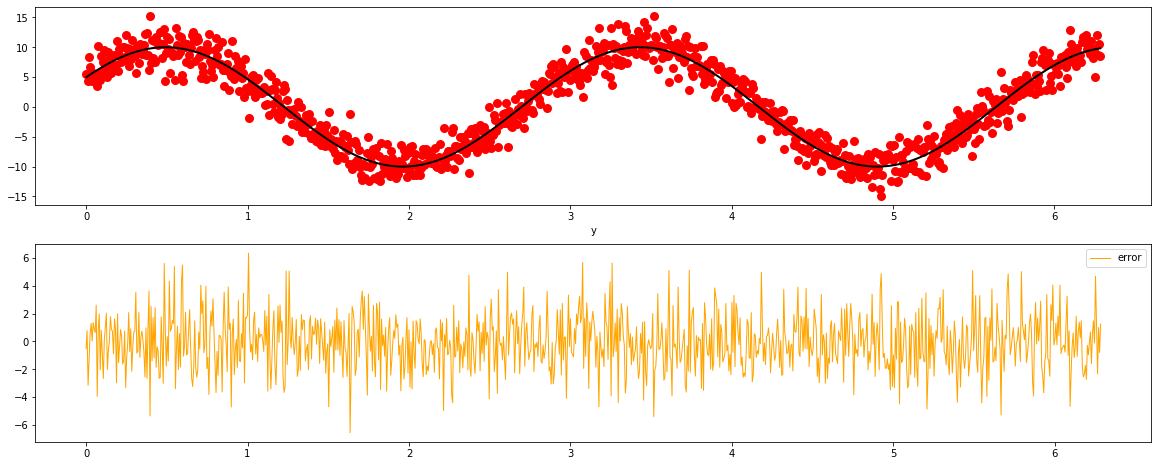

In [58]:
'''
使用最小二乘法拟合正弦函数
'''
import numpy as np
from scipy.optimize import leastsq
import  matplotlib.pyplot as plt 

#定义拟合函数图形
def func(x,p):
    A,k,theta = p
    return A*np.sin(2*np.pi*k*x+theta)

#定义误差函数
def error(p,x,y):
    return y-func(x,p)

#生成训练数据
#随机给出参数的初始值
p0 = [10,0.34,np.pi/6]
A,k,theta = p0
x = np.linspace(0,2*np.pi,1000)
#随机指定参数

y0 = func(x,[A,k,theta])
#randn(m)从标准正态分布中返回m个值，在本例作为噪声
y1 = y0 + 2*np.random.randn(len(x))

#进行参数估计
Para = leastsq(error,p0,args=(x,y1))
A,k,theta = Para[0]
print('A=',A,'k=',k,'theta=',theta)


'''
图形可视化
'''
plt.figure(figsize=(20,8))
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)

#在ax1区域绘图
plt.sca(ax1)
#绘制散点图
plt.scatter(x,y1,color='red',label='Sample Point',linewidth = 3)
plt.xlabel('x')
plt.xlabel('y')
y = func(x,p0)
plt.plot(x,y0,color='black',label='sine',linewidth=2)

#在ax2区域绘图

plt.sca(ax2)
e = y-y1
plt.plot(x,e,color='orange',label='error',linewidth=1)

#显示图例和图形
plt.legend()
plt.savefig('D:/Afig.jpg',dpi = 800)
plt.show()


In [59]:
from sklearn import datasets#引入数据集,sklearn包含众多数据集
from sklearn.model_selection import train_test_split#将数据分为测试集和训练集
from sklearn.neighbors import KNeighborsClassifier#利用邻近点方式训练数据

###引入数据###
iris=datasets.load_iris()#引入iris鸢尾花数据,iris数据包含4个特征变量
iris_X=iris.data#特征变量
iris_y=iris.target#目标值
X_train,X_test,y_train,y_test=train_test_split(iris_X,iris_y,test_size=0.3)#利用train_test_split进行将训练集和测试集进行分开，test_size占30%
print(y_train)#我们看到训练数据的特征值分为3类
'''
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
 '''

###训练数据###
knn=KNeighborsClassifier()#引入训练方法
knn.fit(X_train,y_train)#进行填充测试数据进行训练

###预测数据###
print(knn.predict(X_test))#预测特征值
'''
[1 1 1 0 2 2 1 1 1 0 0 0 2 2 0 1 2 2 0 1 0 0 0 0 0 0 2 1 0 0 0 1 0 2 0 2 0
 1 2 1 0 0 1 0 2]
'''
print(y_test)#真实特征值
'''
[1 1 1 0 1 2 1 1 1 0 0 0 2 2 0 1 2 2 0 1 0 0 0 0 0 0 2 1 0 0 0 1 0 2 0 2 0
 1 2 1 0 0 1 0 2]
'''

[1 1 0 1 0 2 0 2 2 0 0 1 0 2 2 0 2 0 0 0 2 2 2 2 2 1 1 0 0 0 2 1 0 2 1 0 1
 1 2 1 1 0 0 0 0 1 2 2 1 0 0 1 2 0 2 0 1 1 1 0 1 2 0 2 2 0 0 1 1 2 2 0 2 0
 1 1 2 1 1 0 2 1 1 2 0 0 0 1 2 1 1 2 1 0 0 0 2 2 1 1 2 2 2 1 0]
[1 0 0 1 2 2 1 2 1 2 1 1 0 1 1 2 2 0 0 2 1 1 2 0 1 0 0 2 2 1 2 2 1 1 2 2 0
 0 2 1 1 0 2 0 0]
[1 0 0 1 2 2 2 2 1 2 1 1 0 1 1 2 2 0 0 2 1 1 2 0 1 0 0 2 2 1 2 2 1 1 2 1 0
 0 2 1 1 0 2 0 0]


'\n[1 1 1 0 1 2 1 1 1 0 0 0 2 2 0 1 2 2 0 1 0 0 0 0 0 0 2 1 0 0 0 1 0 2 0 2 0\n 1 2 1 0 0 1 0 2]\n'

In [60]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression#引入线性回归模型

###引入数据###
load_data=datasets.load_boston()
data_X=load_data.data
data_y=load_data.target
print(data_X.shape)
#(506, 13)data_X共13个特征变量

###训练数据###
model=LinearRegression()
model.fit(data_X,data_y)
model.predict(data_X[:4,:])#预测前4个数据

###属性和功能###
print(model.coef_)
'''
[ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]
'''
print(model.intercept_)
#36.4911032804
print(model.get_params())#得到模型的参数
#{'copy_X': True, 'normalize': False, 'n_jobs': 1, 'fit_intercept': True}
print(model.score(data_X,data_y))#对训练情况进行打分
#0.740607742865

(506, 13)
[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
36.459488385089855
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
0.7406426641094095


In [62]:
model.score?